In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

def plot_episode_scores(file_paths,column_name,labels,title, window=50, figsize=(12, 6)):
    """
    Plots the rolling average of 'episode_score' from multiple CSV files.
    
    Args:
        file_paths (list of str): List of paths to CSV files.
        window (int): Rolling window size for smoothing the plot.
    """
    plt.figure(figsize=figsize)

    for idx,file_path in enumerate(file_paths):
        try:
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                # label = os.path.split(os.path.dirname(file_path))[1]  # experiment folder name
                plt.plot(df[column_name].rolling(window=window).mean(), label=labels[idx])
            else:
                print(f"{column_name} not found in {file_path}")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_episode_score_distribution(file_paths,column_name,labels,title, figsize=(12, 6)):
    """
    Plots KDE (density) plots of 'episode_score' from multiple CSV files.
    
    Args:
        file_paths (list of str): List of paths to CSV files.
    """
    plt.figure(figsize=figsize)

    for idx,file_path in enumerate(file_paths):
        try:
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                # label = os.path.split(os.path.dirname(file_path))[1]  # experiment folder name
                sns.kdeplot(df[column_name], label=labels[idx], fill=True)
            else:
                print(f"{column_name} column not found in {file_path}")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_best_tile_score_distribution(file_paths,labels,title, column_name='best_tile_score', figsize=(12, 6)):
    """
    Plots a grouped bar chart showing the value count distribution of 'best_tile_score'
    across multiple experiments.

    Args:
        file_paths (list of str): List of paths to CSV files.
        column_name (str): The name of the column to analyze. Default is 'best_tile_score'.
    """
    score_counts = {}
    all_scores = set()

    # Read each CSV and compute value counts
    for idx,file_path in enumerate(file_paths):
        try:
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                label = labels[idx]
                counts = df[column_name].value_counts().sort_index()
                score_counts[label] = counts
                all_scores.update(counts.index)
            else:
                print(f"'{column_name}' column not found in {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    all_scores = sorted(all_scores)
    
    # Combine into a DataFrame with missing values filled as 0
    combined = pd.DataFrame({
        label: score_counts[label].reindex(all_scores, fill_value=0)
        for label in score_counts
    })

    # Plot
    combined.plot(kind='bar', figsize=figsize)
    plt.xlabel('Best Tile Score')
    plt.ylabel('Count')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def calculate_average_score(files, labels, column):
    for idx,file_path in enumerate(files):
        df = pd.read_csv(file_path)
        if column in df.columns:
            label = labels[idx]
            average = df[column].mean()
            print(f"Average '{column}' {label} : {average}")


# Train

Average 'episode_score' DQN Full_Score : 3672.088
Average 'episode_score' DQN Merge_score : 3427.0472
Average 'episode_score' DQN Guide_Score : 6244.0596


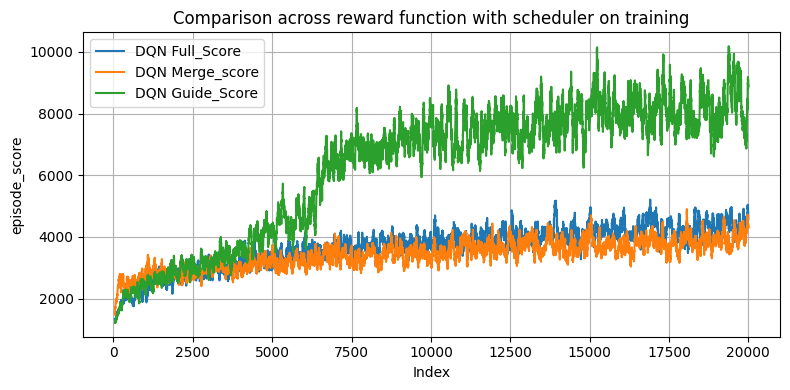

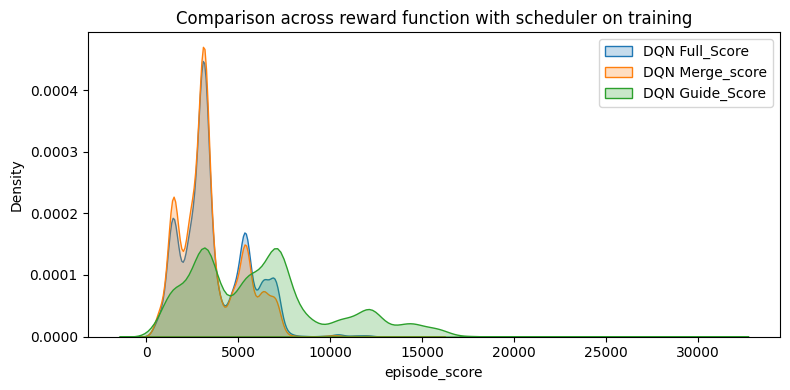

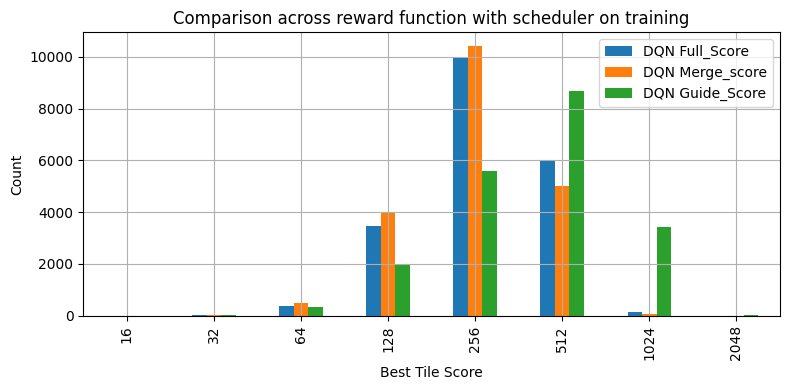

In [7]:
Train_reward_experiment_files = [
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp1\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp2\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp4\train_log.csv",
]
Train_reward_experiment_labels = [
    r"DQN Full_Score",
    r"DQN Merge_score",
    r"DQN Guide_Score"
]

calculate_average_score(Train_reward_experiment_files,Train_reward_experiment_labels,'episode_score')
plot_episode_scores(Train_reward_experiment_files,'episode_score',Train_reward_experiment_labels,'Comparison across reward function with scheduler on training' ,window=50,figsize=(8, 4))
plot_episode_score_distribution(Train_reward_experiment_files,'episode_score',Train_reward_experiment_labels,'Comparison across reward function with scheduler on training',figsize=(8, 4))
plot_best_tile_score_distribution(Train_reward_experiment_files,Train_reward_experiment_labels,'Comparison across reward function with scheduler on training',figsize=(8, 4))

Average 'episode_score' DQN with scheduler : 6244.0596
Average 'episode_score' DQN without scheduler : 6169.7788
Average 'episode_score' DoubleDQN with scheduler : 3705.4024
Average 'episode_score' DoubleDQN without scheduler : 6731.9724
Average 'episode_score' DuelingDQN with scheduler : 4506.6306
Average 'episode_score' DuelingDQN without scheduler : 6025.3562


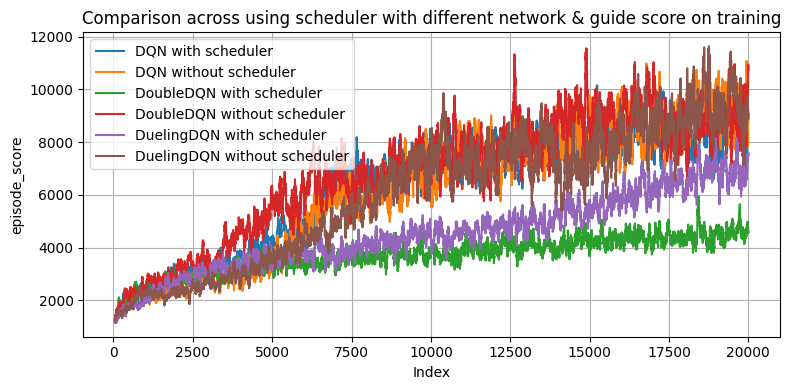

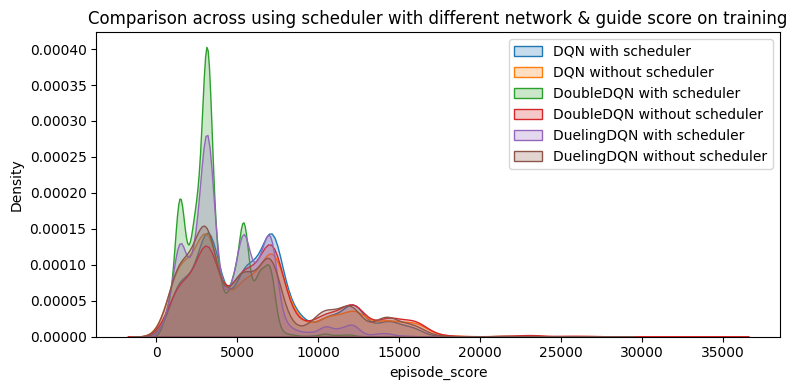

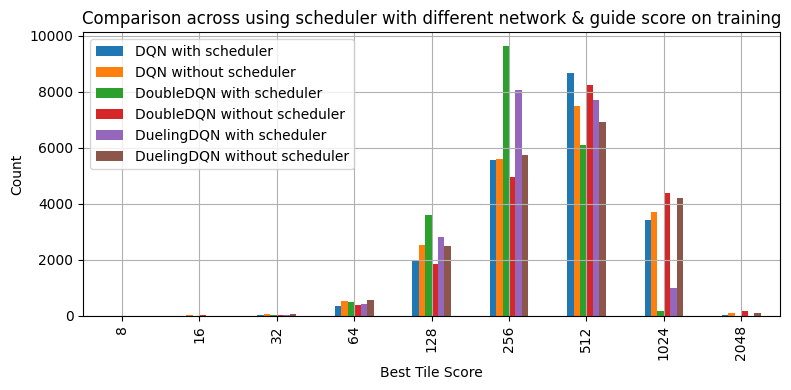

In [8]:
Train_guide_sche_files = [
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp4\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp9_guide_no_sheduler\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DoubleDQN_policy_exp2\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DoubleDQN_policy_exp3\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DuelingDQN_policy_exp2\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DuelingDQN_policy_exp3\train_log.csv",
]
Train_guide_sche_labels = [
    r"DQN with scheduler",
    r"DQN without scheduler",
    r"DoubleDQN with scheduler",
    r"DoubleDQN without scheduler",
    r"DuelingDQN with scheduler",
    r"DuelingDQN without scheduler",
]

calculate_average_score(Train_guide_sche_files,Train_guide_sche_labels,'episode_score')
plot_episode_scores(Train_guide_sche_files,'episode_score',Train_guide_sche_labels,'Comparison across using scheduler with different network & guide score on training',window=50,figsize=(8, 4))
plot_episode_score_distribution(Train_guide_sche_files,'episode_score',Train_guide_sche_labels,'Comparison across using scheduler with different network & guide score on training',figsize=(8, 4))
plot_best_tile_score_distribution(Train_guide_sche_files,Train_guide_sche_labels,'Comparison across using scheduler with different network & guide score on training',figsize=(8, 4))

Average 'loss' DQN with scheduler : 6658.867004915976
Average 'loss' DQN without scheduler : 5476.70988578453
Average 'loss' DoubleDQN with scheduler : 4497.632044941616
Average 'loss' DoubleDQN without scheduler : 4753.825399581194
Average 'loss' DuelingDQN with scheduler : 2882.717987281799
Average 'loss' DuelingDQN without scheduler : 856.7370314382553


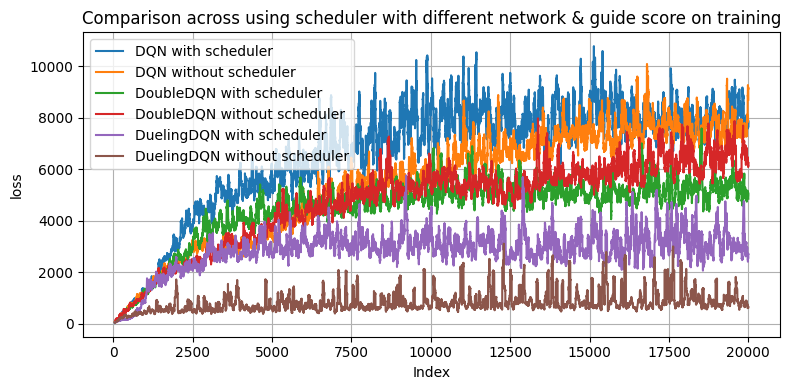

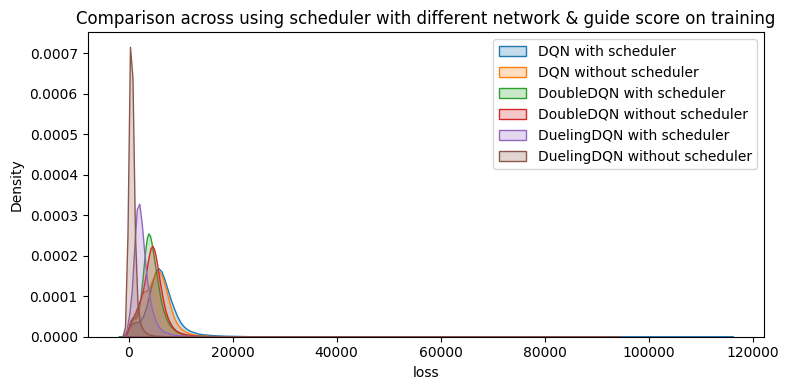

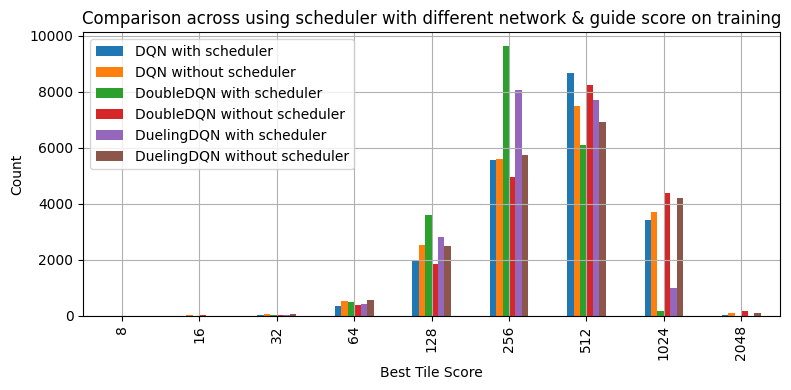

In [9]:
Train_guide_sche_files = [
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp4\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DQN_policy_exp9_guide_no_sheduler\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DoubleDQN_policy_exp2\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DoubleDQN_policy_exp3\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DuelingDQN_policy_exp2\train_log.csv",
    r"C:\STORAGE\FIBO\Sem_4_2\DRL\DRL_final\DuelingDQN_policy_exp3\train_log.csv",
]
Train_guide_sche_labels = [
    r"DQN with scheduler",
    r"DQN without scheduler",
    r"DoubleDQN with scheduler",
    r"DoubleDQN without scheduler",
    r"DuelingDQN with scheduler",
    r"DuelingDQN without scheduler",
]

calculate_average_score(Train_guide_sche_files,Train_guide_sche_labels,'loss')
plot_episode_scores(Train_guide_sche_files,'loss',Train_guide_sche_labels,'Comparison across using scheduler with different network & guide score on training',window=50,figsize=(8, 4))
plot_episode_score_distribution(Train_guide_sche_files,'loss',Train_guide_sche_labels,'Comparison across using scheduler with different network & guide score on training',figsize=(8, 4))
plot_best_tile_score_distribution(Train_guide_sche_files,Train_guide_sche_labels,'Comparison across using scheduler with different network & guide score on training',figsize=(8, 4))

# Play

Average 'episode_score' DQN Full_Score : 4296.866666666667
Average 'episode_score' DQN Merge_score : 3913.693333333333
Average 'episode_score' DQN Guide_Score : 9634.6


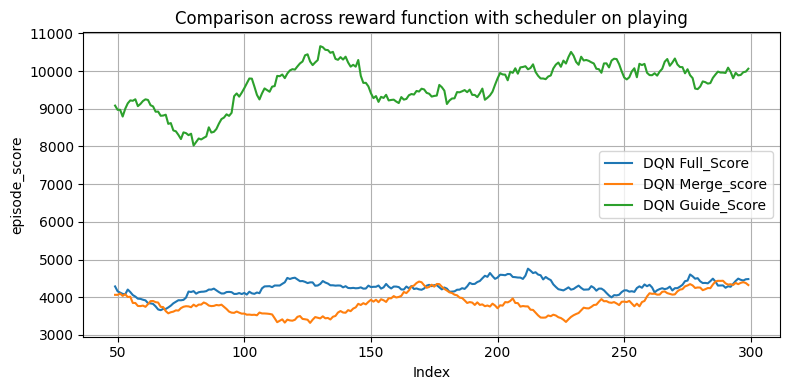

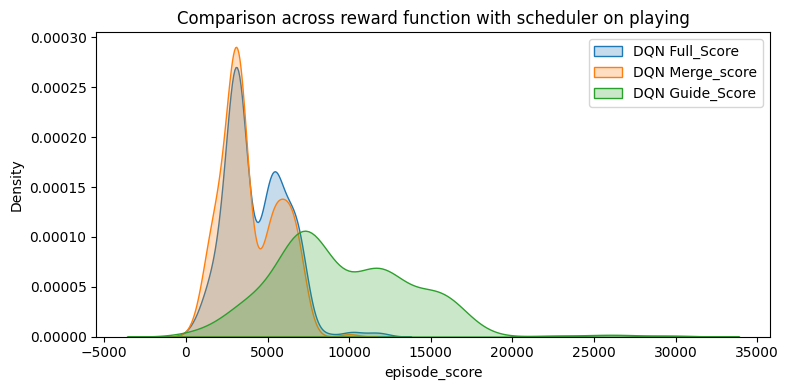

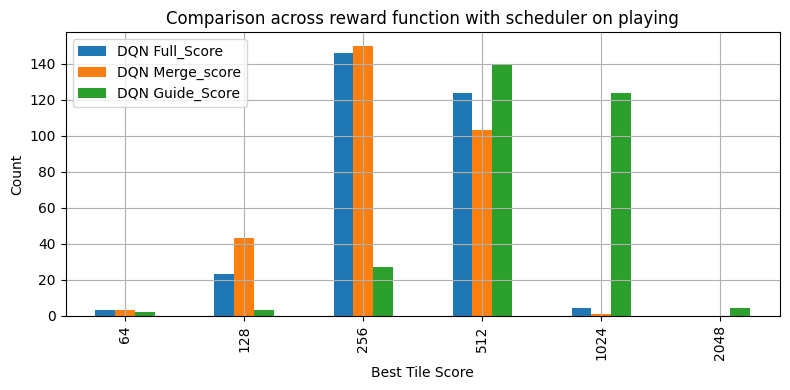

In [10]:
Reward_experiment_files = [
    r"play_output\DQN_full_score\play_log.csv",
    r"play_output\DQN_merge_score\play_log.csv",
    r"play_output\DQN_guide_score\play_log.csv",
]
Reward_experiment_labels = [
    r"DQN Full_Score",
    r"DQN Merge_score",
    r"DQN Guide_Score"
]

calculate_average_score(Reward_experiment_files,Reward_experiment_labels,'episode_score')
plot_episode_scores(Reward_experiment_files,'episode_score',Reward_experiment_labels,'Comparison across reward function with scheduler on playing',window=50,figsize=(8, 4))
plot_episode_score_distribution(Reward_experiment_files,'episode_score',Reward_experiment_labels,'Comparison across reward function with scheduler on playing',figsize=(8, 4))
plot_best_tile_score_distribution(Reward_experiment_files,Reward_experiment_labels,'Comparison across reward function with scheduler on playing',figsize=(8, 4))


Average 'episode_score' DQN Guide_Score with scheduler : 9634.6
Average 'episode_score' DQN Guide_Score without scheduler : 10607.68


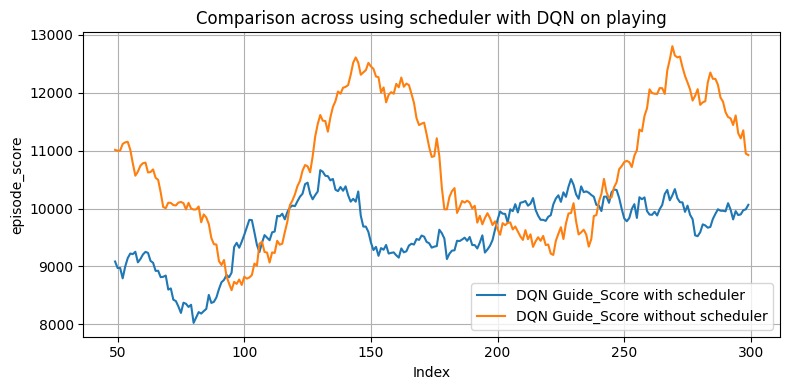

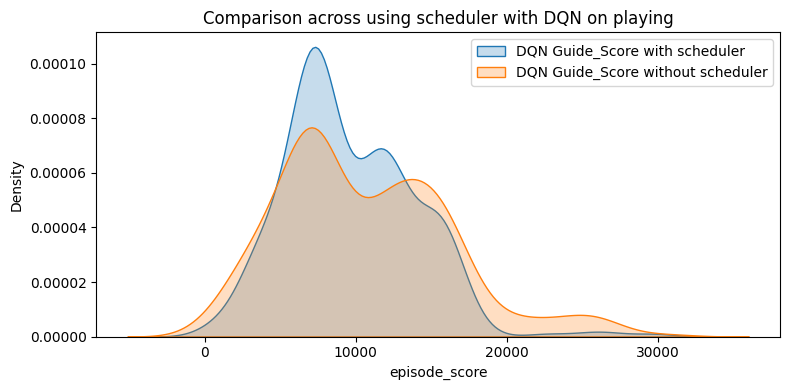

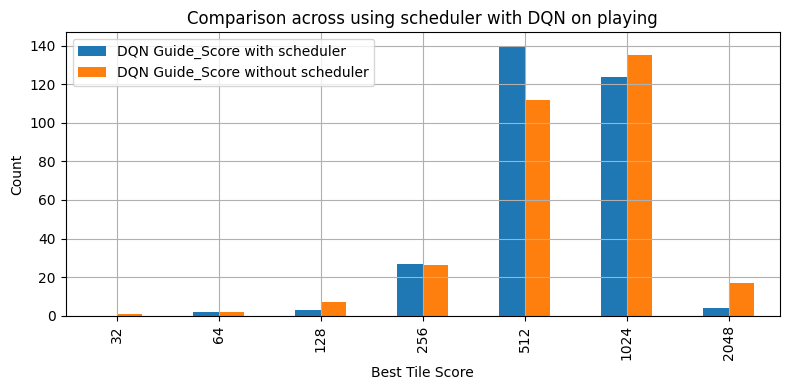

In [11]:
DQN_guide_sche_files = [
    r"play_output\DQN_guide_score\play_log.csv",
    r"play_output\DQN_guide_score_no_scheduler\play_log.csv"
]
DQN_guide_sche_labels = [
    r"DQN Guide_Score with scheduler",
    r"DQN Guide_Score without scheduler"
]

calculate_average_score(DQN_guide_sche_files,DQN_guide_sche_labels,'episode_score')
plot_episode_scores(DQN_guide_sche_files,'episode_score',DQN_guide_sche_labels,'Comparison across using scheduler with DQN on playing',window=50,figsize=(8, 4))
plot_episode_score_distribution(DQN_guide_sche_files,'episode_score',DQN_guide_sche_labels,'Comparison across using scheduler with DQN on playing',figsize=(8, 4))
plot_best_tile_score_distribution(DQN_guide_sche_files,DQN_guide_sche_labels,'Comparison across using scheduler with DQN on playing',figsize=(8, 4))

Average 'episode_score' DoubleDQN Guide_Score with scheduler : 4270.24
Average 'episode_score' DoubleDQN Guide_Score without scheduler : 9926.64


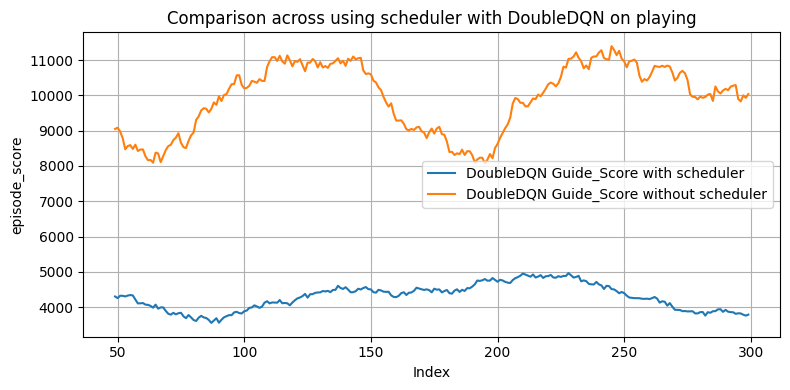

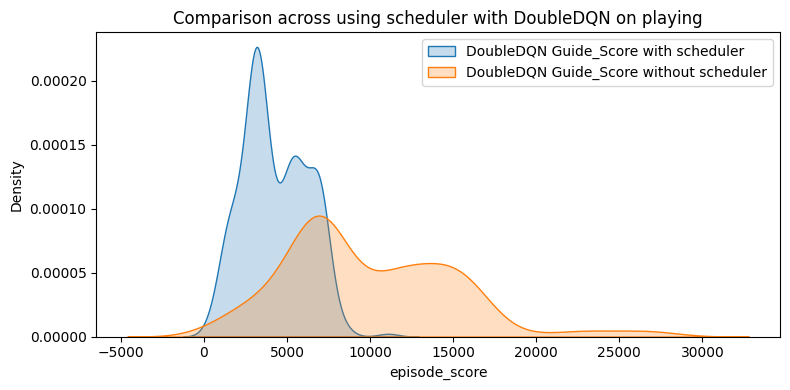

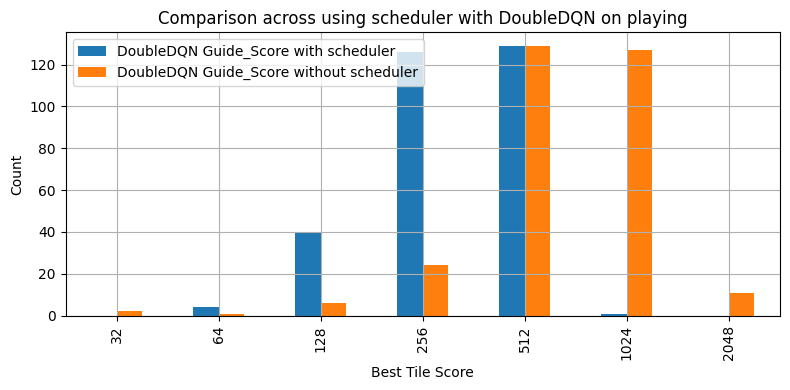

In [12]:
Double_guide_sche_files = [
    r'play_output\DoubleDQN_guide_scheduler\play_log.csv',
    r'play_output\DoubleDQN_guide_no_scheduler\play_log.csv'
]
Double_guide_sche_labels = [
    r"DoubleDQN Guide_Score with scheduler",
    r"DoubleDQN Guide_Score without scheduler"
]

calculate_average_score(Double_guide_sche_files,Double_guide_sche_labels,'episode_score')
plot_episode_scores(Double_guide_sche_files,'episode_score',Double_guide_sche_labels,'Comparison across using scheduler with DoubleDQN on playing',window=50,figsize=(8, 4))
plot_episode_score_distribution(Double_guide_sche_files,'episode_score',Double_guide_sche_labels,'Comparison across using scheduler with DoubleDQN on playing',figsize=(8, 4))
plot_best_tile_score_distribution(Double_guide_sche_files,Double_guide_sche_labels,'Comparison across using scheduler with DoubleDQN on playing',figsize=(8, 4))

Average 'episode_score' DuelingDQN Guide_Score with scheduler : 7490.533333333334
Average 'episode_score' DuelingDQN Guide_Score without scheduler : 11343.453333333333


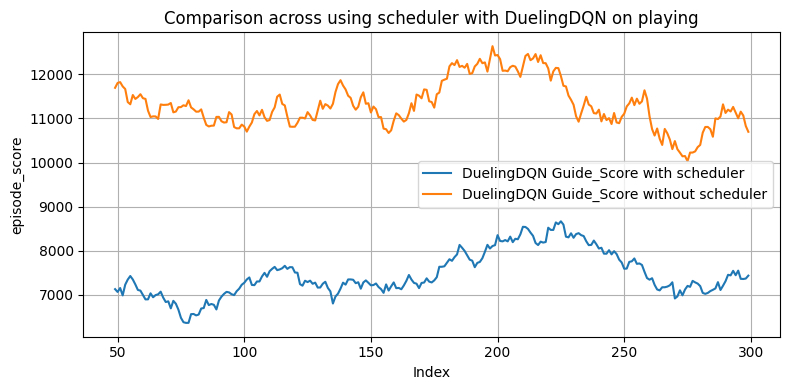

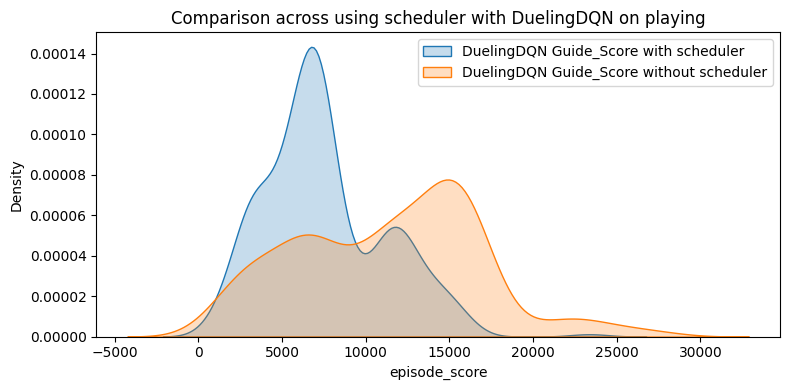

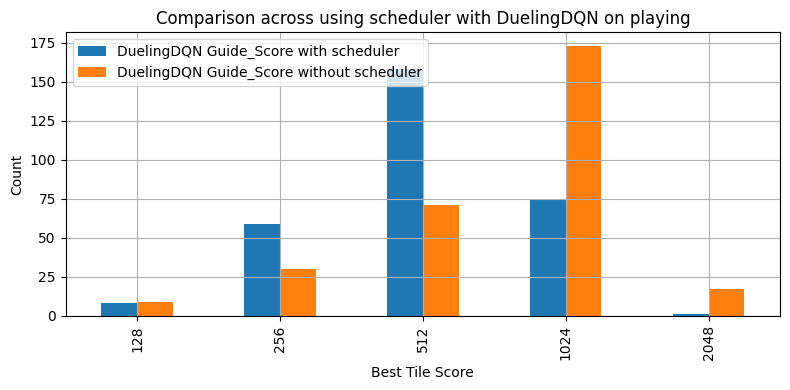

In [13]:
Dueling_guide_sche_files = [
    r'play_output\DuelingDQN_guide_scheduler\play_log.csv',
    r'play_output\DuelingDQN_guide_no_scheduler\play_log.csv'
]
Dueling_guide_sche_labels = [
    r"DuelingDQN Guide_Score with scheduler",
    r"DuelingDQN Guide_Score without scheduler"
]

calculate_average_score(Dueling_guide_sche_files,Dueling_guide_sche_labels,'episode_score')
plot_episode_scores(Dueling_guide_sche_files,'episode_score',Dueling_guide_sche_labels,'Comparison across using scheduler with DuelingDQN on playing',window=50,figsize=(8, 4))
plot_episode_score_distribution(Dueling_guide_sche_files,'episode_score',Dueling_guide_sche_labels,'Comparison across using scheduler with DuelingDQN on playing',figsize=(8, 4))
plot_best_tile_score_distribution(Dueling_guide_sche_files,Dueling_guide_sche_labels,'Comparison across using scheduler with DuelingDQN on playing',figsize=(8, 4))

Average 'episode_score' DQN normal with scheduler : 4296.866666666667
Average 'episode_score' DQN preset 512 with scheduler : 3518.4533333333334
Average 'episode_score' DQN preset 1024 with scheduler : 3211.48


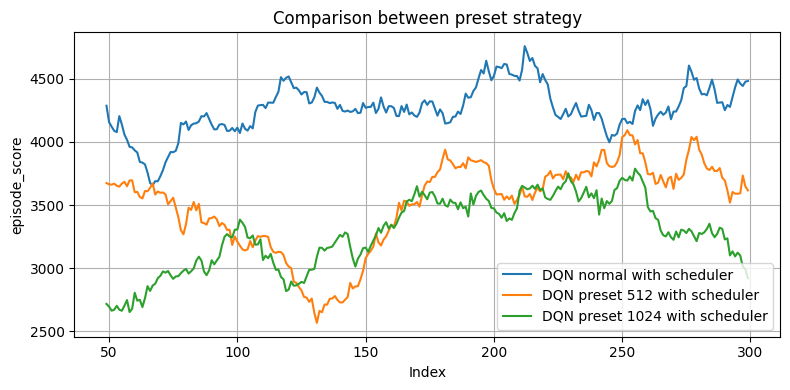

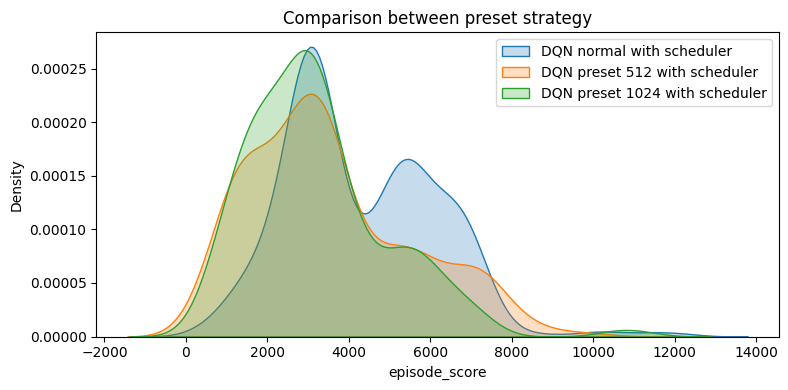

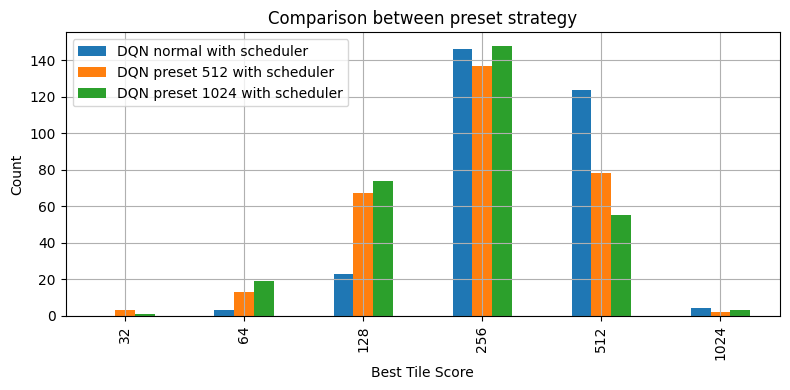

In [14]:
preset_board_files = [
    r"play_output\DQN_full_score\play_log.csv",
    r"play_output\DQN_preset_512\play_log.csv",
    r"play_output\DQN_preset_1024\play_log.csv",
]
preset_board_labels = [
    r"DQN normal with scheduler",
    r"DQN preset 512 with scheduler",
    r"DQN preset 1024 with scheduler",
]

calculate_average_score(preset_board_files,preset_board_labels,'episode_score')
plot_episode_scores(preset_board_files,'episode_score',preset_board_labels,'Comparison between preset strategy',window=50,figsize=(8, 4))
plot_episode_score_distribution(preset_board_files,'episode_score',preset_board_labels,'Comparison between preset strategy',figsize=(8, 4))
plot_best_tile_score_distribution(preset_board_files,preset_board_labels,'Comparison between preset strategy',figsize=(8, 4))

Average 'episode_score' DQN Guide_Score with scheduler : 9634.6
Average 'episode_score' DQN Guide_Score without scheduler : 10607.68
Average 'episode_score' DoubleDQN Guide_Score with scheduler : 4270.24
Average 'episode_score' DoubleDQN Guide_Score without scheduler : 9926.64
Average 'episode_score' DuelingDQN Guide_Score with scheduler : 7490.533333333334
Average 'episode_score' DuelingDQN Guide_Score without scheduler : 11343.453333333333


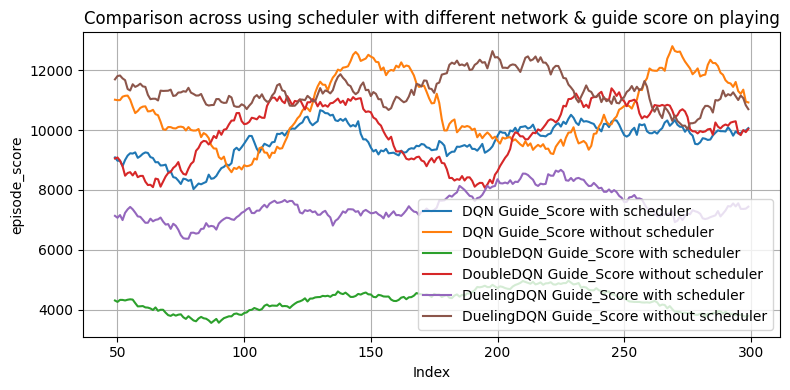

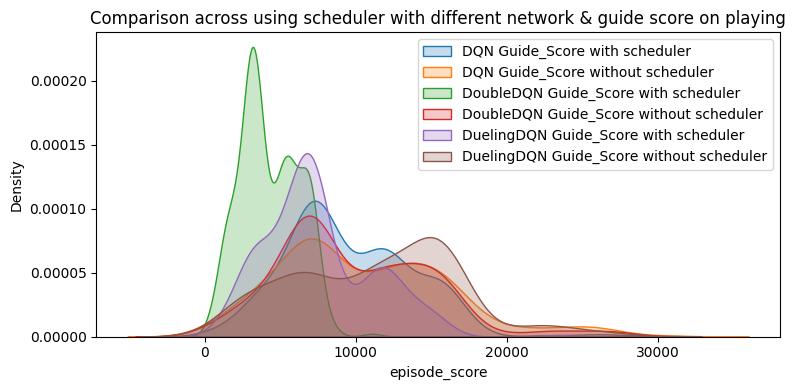

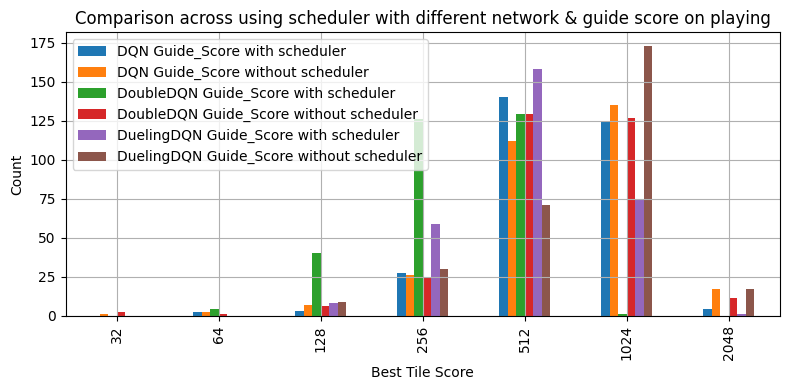

In [15]:
all_guide = []
all_guide.extend(DQN_guide_sche_files)
all_guide.extend(Double_guide_sche_files)
all_guide.extend(Dueling_guide_sche_files)

all_labels = []
all_labels.extend(DQN_guide_sche_labels)
all_labels.extend(Double_guide_sche_labels)
all_labels.extend(Dueling_guide_sche_labels)

calculate_average_score(all_guide,all_labels,'episode_score')
plot_episode_scores(all_guide,'episode_score',all_labels,'Comparison across using scheduler with different network & guide score on playing',window=50,figsize=(8, 4))
plot_episode_score_distribution(all_guide,'episode_score',all_labels,'Comparison across using scheduler with different network & guide score on playing',figsize=(8, 4))
plot_best_tile_score_distribution(all_guide,all_labels,'Comparison across using scheduler with different network & guide score on playing',figsize=(8, 4))